Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 12</span>


## Exercise 12.1

Change at will and train your DNN by increasing the number of epochs to an adeuqate value. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Choose the Optimizer and the Cost Function
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
# Load MNIST data
from keras.datasets import mnist

In [ ]:
def print_performance(score, history, title):
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # Look into training history
    # Summarize history for accuracy
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title(title)


    # Summarize history for loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

def create_DNN(num_classes, input_shape):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=input_shape, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    print('Model architecture created successfully!')

    return model

def compile_DNN_model(opt, num_classes, input_shape):
    # create the model
    model=create_DNN(num_classes, input_shape)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])

    print('Model compiled successfully and ready to be trained.')

    return model

def get_data(NNtype, num_classes):
    # Load MNIST data
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    img_rows, img_cols = 28, 28
    # reshape data, it could depend on Keras backend
    if(NNtype == 'DNN'):
        X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
        X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
        input_shape = (img_rows*img_cols,)

    if(NNtype == 'CNN'):
        if keras.backend.image_data_format() == 'channels_first':
            X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
            X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
            X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

    print('X_train shape:', X_train.shape)
    print('Y_train shape:', Y_train.shape)
    print()
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # Cast to floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # Rescale data to interval [0,1]
    X_train /= 255
    X_test /= 255
    # Convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    return (X_train, Y_train), (X_test, Y_test), input_shape

In [ ]:
def create_DNN(num_classes, input_shape):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=input_shape, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    print('Model architecture created successfully!')

    return model

def compile_DNN_model(opt, num_classes, input_shape):
    # create the model
    model=create_DNN(num_classes, input_shape)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])

    print('Model compiled successfully and ready to be trained.')

    return model

X_train shape: (60000, 784)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Model architecture created successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compiled successfully and ready to be trained.
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6335 - loss: 1.1823 - val_acc: 0.9122 - val_loss: 0.3179
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.8803 - loss: 0.4228 - val_acc: 0.9278 - val_loss: 0.2448
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9067 - loss: 0.3332 - val_acc: 0.9384 - val_loss: 0.2054
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.9206 - loss: 0.2849 - val_acc: 0.9456 - val_loss: 0.1805
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9297 - loss: 0.2517 - val_acc: 0.9513 - val_loss: 0.1607
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.9373 - loss: 0.2289 - val_acc: 0.9557 - val_loss: 0.1471
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9473 - loss: 0.1716

Test loss: 0.14706505835056305
Test accuracy: 0.9556999802589417


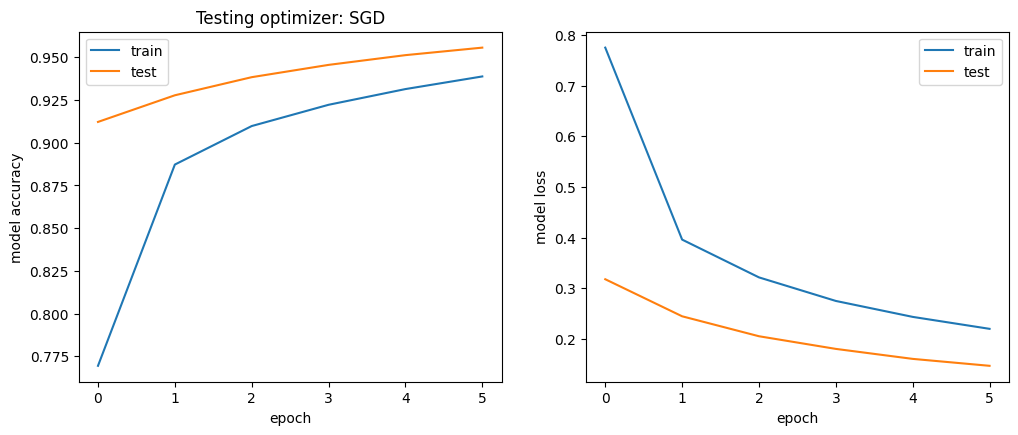

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


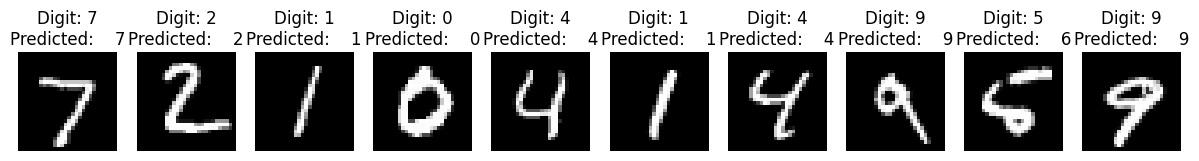

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.8574 - loss: 0.4714 - val_acc: 0.9666 - val_loss: 0.1074
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - acc: 0.9624 - loss: 0.1361 - val_acc: 0.9728 - val_loss: 0.0919
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9730 - loss: 0.0926 - val_acc: 0.9745 - val_loss: 0.0892
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - acc: 0.9787 - loss: 0.0726 - val_acc: 0.9759 - val_loss: 0.0842
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - acc: 0.9824 - loss: 0.0581 - val_acc: 0.9781 - val_loss: 0.0890
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - acc: 0.9841 - loss: 0.0525 - val_acc: 0.9802 - val_loss: 0.0859
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9763 - loss: 0.1058

Test loss: 0.0858711525797844
Test accuracy: 0.9801999926567078


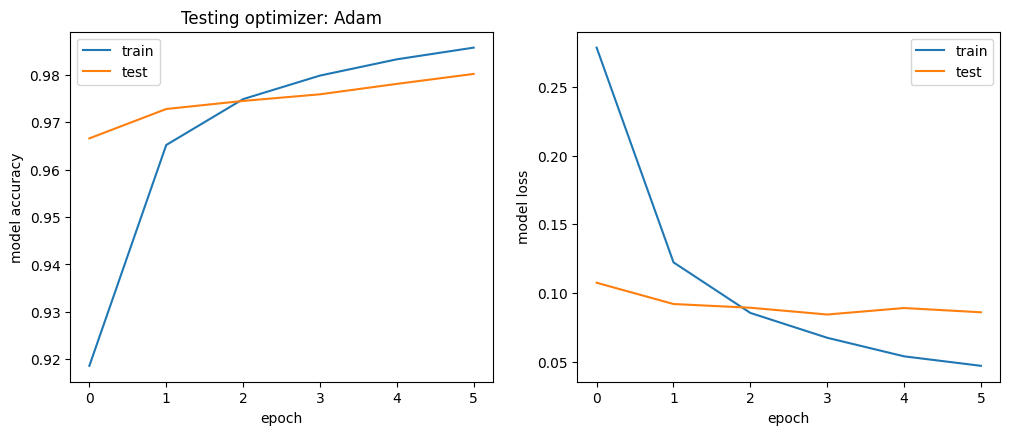

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


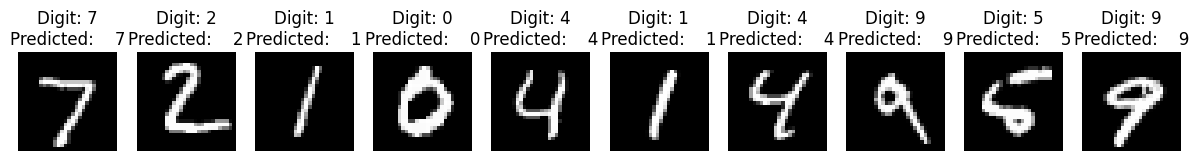

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.8604 - loss: 0.4641 - val_acc: 0.9684 - val_loss: 0.1118
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9613 - loss: 0.1487 - val_acc: 0.9744 - val_loss: 0.1050
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - acc: 0.9689 - loss: 0.1298 - val_acc: 0.9719 - val_loss: 0.1448
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - acc: 0.9710 - loss: 0.1204 - val_acc: 0.9771 - val_loss: 0.1203
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.9736 - loss: 0.1181 - val_acc: 0.9774 - val_loss: 0.1310
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - acc: 0.9755 - loss: 0.1154 - val_acc: 0.9732 - val_loss: 0.1574
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9690 - loss: 0.1796

Test loss: 0.1573905497789383
Test accuracy: 0.9732000231742859


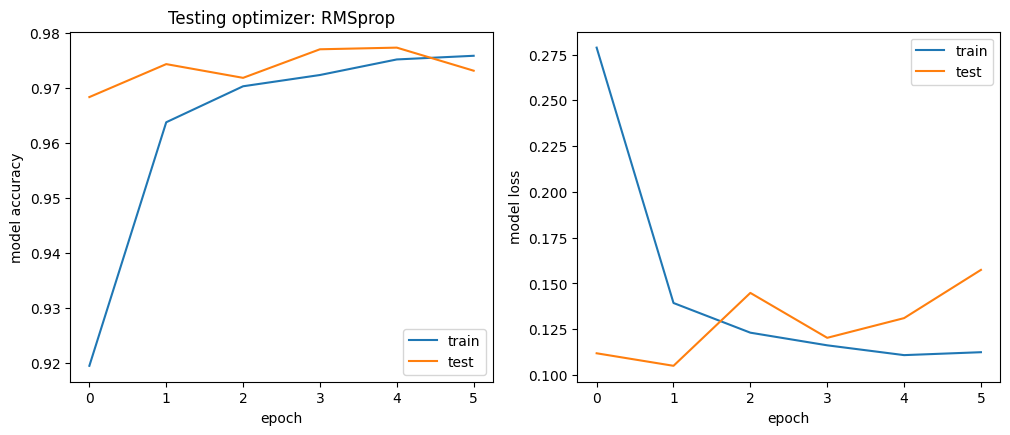

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


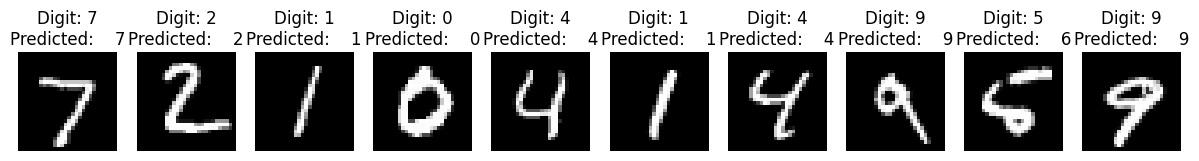

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.4606 - loss: 1.6899 - val_acc: 0.8616 - val_loss: 0.6220
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.7866 - loss: 0.7445 - val_acc: 0.8907 - val_loss: 0.4415
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - acc: 0.8327 - loss: 0.5848 - val_acc: 0.9019 - val_loss: 0.3768
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8539 - loss: 0.5113 - val_acc: 0.9085 - val_loss: 0.3394
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8674 - loss: 0.4666 - val_acc: 0.9146 - val_loss: 0.3141
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8764 - loss: 0.4385 - val_acc: 0.9185 - val_loss: 0.2962
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9041 - loss: 0.3431

Test loss: 0.29619747400283813
Test accuracy: 0.9185000061988831


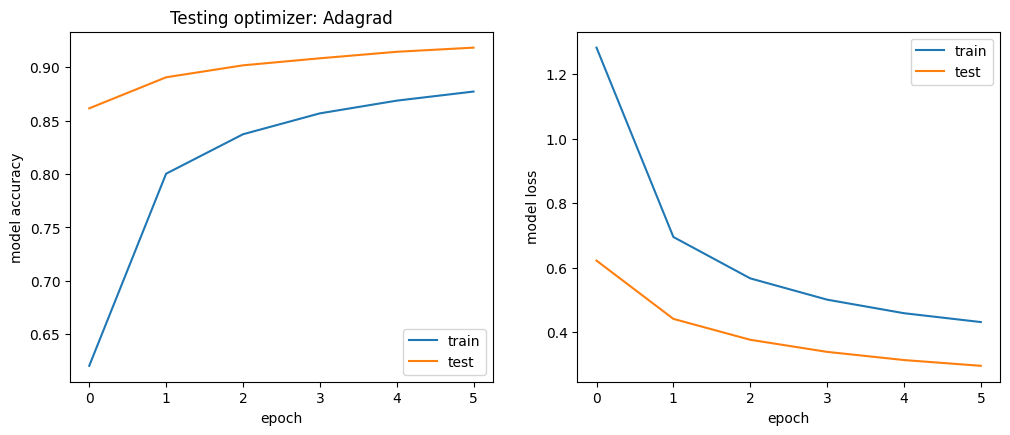

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


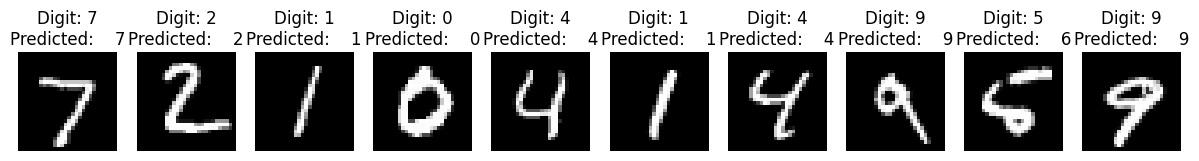

In [ ]:
# Set random seed for reproducibility
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
################ exercise 12.1
# training parameters
batch_size = 32
epochs = 6
num_classes = 10;
img_rows, img_cols = 28, 28
# Load MNIST data
(X_train, Y_train), (X_test, Y_test), input_shape = get_data('DNN', num_classes)
#candidate optimizer
optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad']
for opt in optimizers:
    # create the deep neural net
    model_DNN = compile_DNN_model(opt, num_classes, input_shape)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

    # print performance
    print_performance(score, history, "Testing optimizer: " + opt)

    predictions = model_DNN.predict(X_test)
    X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    plt.figure(figsize=(15, 15))
    for i in range(10):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(X_test_plot[i, :, :, 0], cmap='gray')
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
        plt.axis('off')
    plt.show()


Adagrad and SGD show good training vs testing curves, while Adam and RMSprop show signs of oveerfitting: the models fail to generalize to newer input data, as it's shown by the testing sharp increase

### Exercise 12.2

Now the same task is addressed with a convolutional neural network

In [ ]:
# You will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D,  Dense, Dropout
from keras.models import Sequential

In [ ]:
def create_CNN(num_classes, input_shape):
    # Instantiate model
    model = Sequential()
    # Add convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten the convolutional layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    print('Model architecture created successfully!')

    return model

def compile_CNN_model(num_classes, input_shape):
    # Create the model
    model = create_CNN(num_classes, input_shape)
    # Compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    print('Model compiled successfully and ready to be trained.')
    return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - acc: 0.8564 - loss: 0.4682 - val_acc: 0.9777 - val_loss: 0.0705
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - acc: 0.9630 - loss: 0.1209 - val_acc: 0.9813 - val_loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - acc: 0.9724 - loss: 0.0940 - val_acc: 0.9844 - val_loss: 0.0442
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - acc: 0.9765 - loss: 0.0755 - val_acc: 0.9857 - val_loss: 0.0417
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - acc: 0.9792 - loss: 0.0654 - val_acc: 0.9859 - val_loss: 0.0422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - acc: 0.9824 - loss: 0.0542 - val_acc: 0.9860 - val_loss: 0.0411
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - acc: 0.9842 - loss: 0.0499 - val_acc: 0.9891 - val_loss: 0.0354
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/s

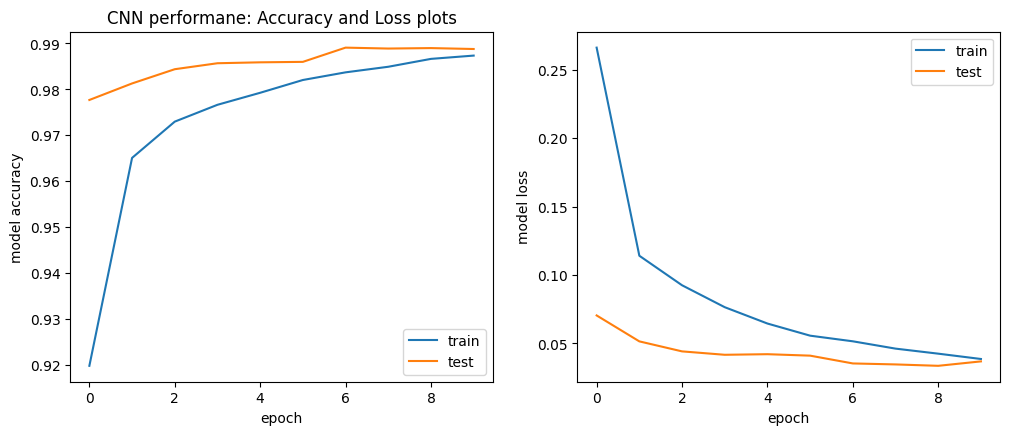

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


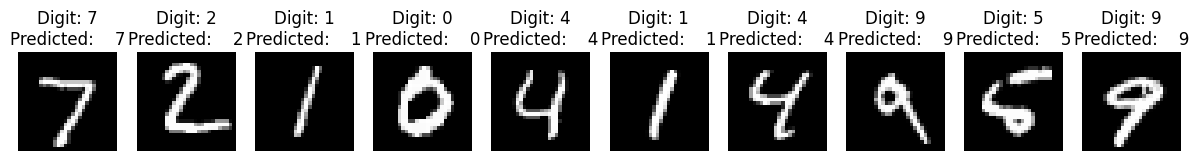

In [ ]:
# Training parameters
batch_size = 32
epochs = 10
num_classes = 10;
# Load MNIST data
(X_train, Y_train), (X_test, Y_test), input_shape = get_data('CNN', num_classes)
# Create the deep neural net
model_CNN = compile_CNN_model(num_classes, input_shape)

# Train CNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test, Y_test))

# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print_performance(score, history, "CNN performane: Accuracy and Loss plots")

# Predict and visualize the results
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

### Exercise 12.3
At last we test the CNN on my own handwritten digits, stored in ./numbers/

In [ ]:
from google.colab import files
upload = files.upload() #leave commented if you are not reading this on colab

Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png


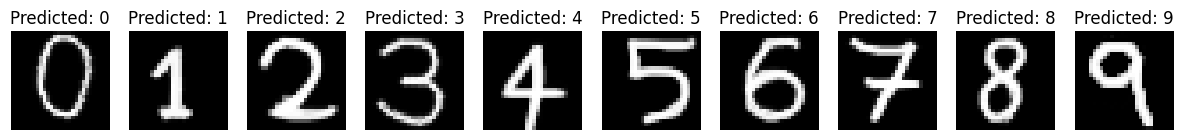

In [ ]:

from PIL import Image
import os

plt.figure(figsize=(15, 15))
for n in range(0, 10):
  filename = str(n) + ".png" # modify this in: ".
umbers" + str(n) + ".png" if you are not on colab  
  digit_in = Image.open(filename).convert('L')
  ydim, xdim = digit_in.size
  #print("Image size: "+str(xdim)+"x"+str(ydim))
  pix=digit_in.load();
  data = np.zeros((xdim, ydim))
  for j in range(ydim):
      for i in range(xdim):
          data[i,j]=pix[j,i]

  data /= 255
  # Reshape the data to match the CNN input shape (1, img_rows, img_cols, 1)
  #print(data.shape)
  data = data.reshape(1,xdim,ydim,1)
  pred_0 = model_CNN.predict(data, verbose=0)

  data = data.reshape(xdim,ydim)
  plt.subplot(1,10,n+1)
  plt.imshow(data, cmap='gray')
  plt.title("Predicted: {}".format(np.argmax(pred_0)))
  plt.axis('off')
plt.show()

The model predicted 10 out of 10 numbers! Maybe I tried too hard writing them well.